In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
print("SellerType---", df['Seller_Type'].unique())
print("FuelType---", df['Fuel_Type'].unique())
print("Transmission---", df['Transmission'].unique())
print("Owner----", df['Owner'].unique())

SellerType--- ['Dealer' 'Individual']
FuelType--- ['Petrol' 'Diesel' 'CNG']
Transmission--- ['Manual' 'Automatic']
Owner---- [0 1 3]


In [6]:
## missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
final_df = df.drop('Car_Name', axis=1)
final_df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
final_df['Current Year']=2021

In [12]:
final_df["Num of Years"] = final_df["Current Year"] - final_df['Year']
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,Num of Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [13]:
final_df.drop(['Year','Current Year'], axis=1, inplace=True)

In [14]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Num of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [15]:
final_df = pd.get_dummies(final_df, drop_first=True)

In [16]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [17]:
## correlation
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Num of Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [18]:
import seaborn as sn

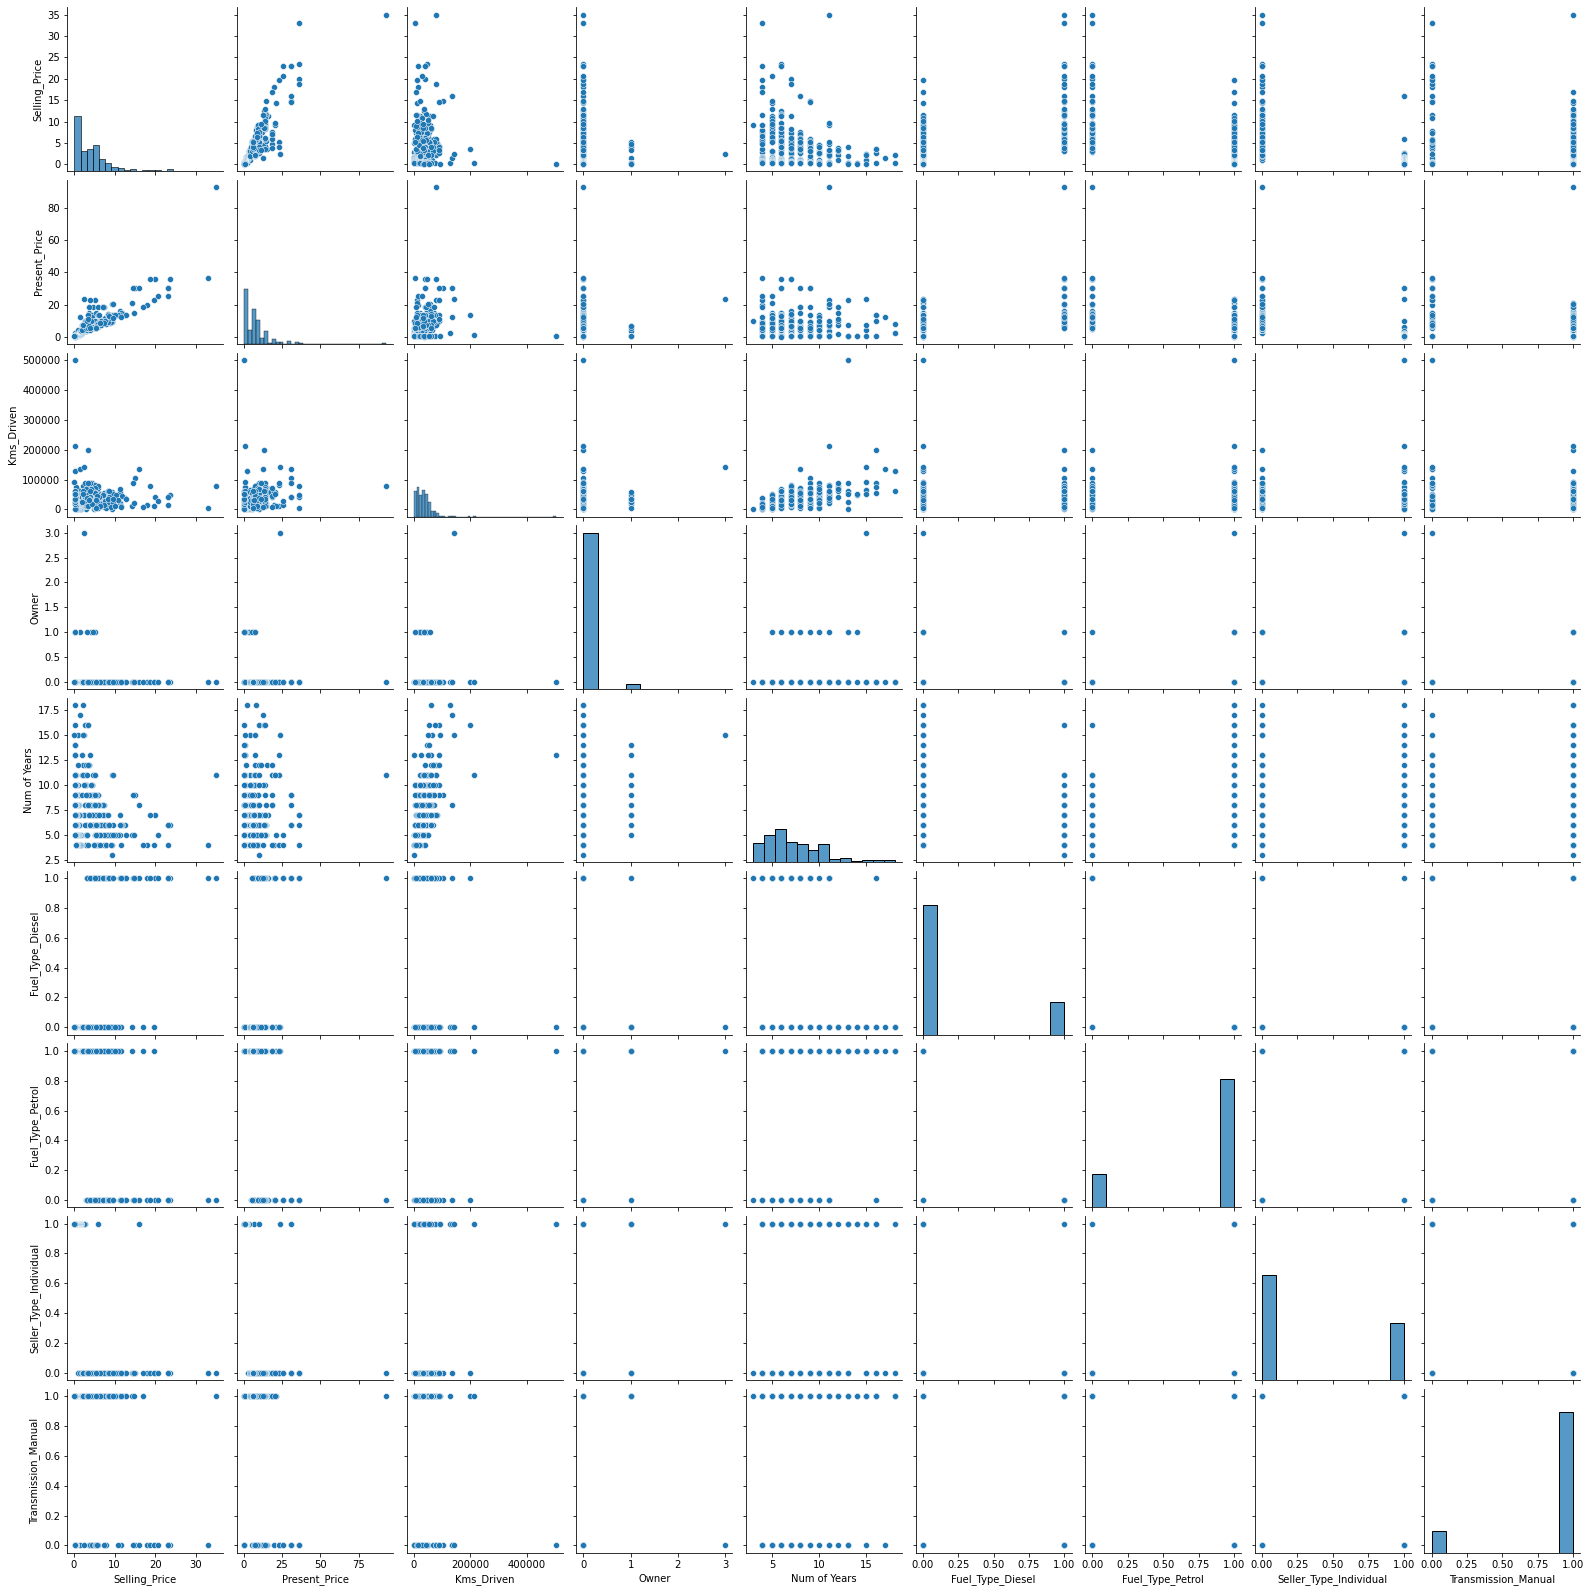

In [19]:
sn.pairplot(final_df)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

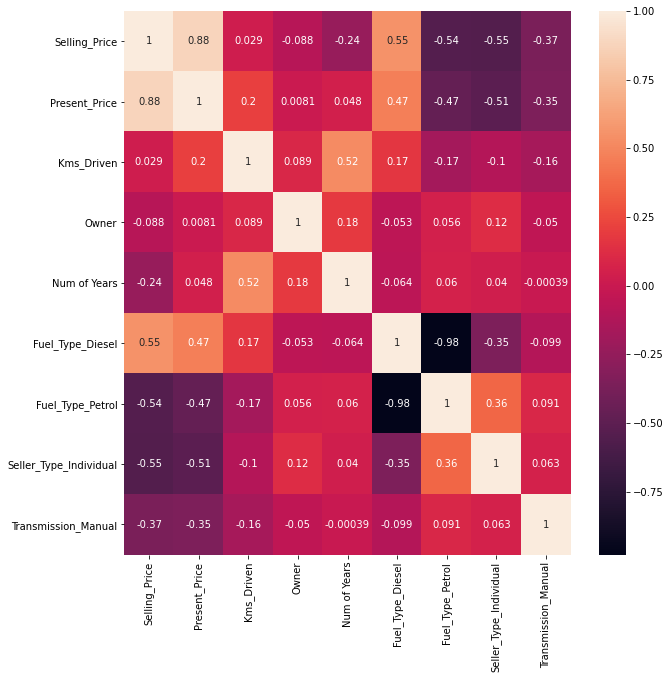

In [21]:
corr = final_df.corr()
top_features = corr.index
plt.figure(figsize=(10,10))
sn.heatmap(final_df[top_features].corr(), annot=True)

In [22]:
x = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [23]:
x.head()

,Present_Price,Kms_Driven,Owner,Num of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [24]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [25]:
## features importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [26]:
model.feature_importances_

array([0.37174208, 0.04219871, 0.00055806, 0.07472007, 0.21942193,
       0.02076513, 0.12998053, 0.14061349])

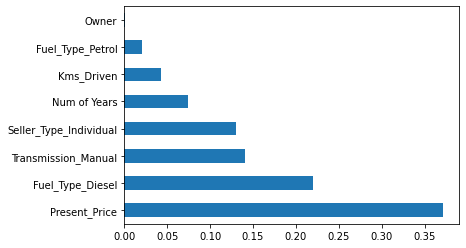

In [27]:
##plot graph for feature importance
feat_imp = pd.Series(model.feature_importances_, x.columns)
feat_imp.nlargest(8).plot(kind='barh')
plt.show()

In [28]:
##train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [29]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((240, 8), (61, 8), (240,), (61,))

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [34]:
##hyperparameter
import numpy as np
n_estimators= [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [35]:
##hyperparamter tuning
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [40]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [41]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [42]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [43]:
rf_random.best_score_

-2.186325442490964

In [45]:
predictions=rf_random.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

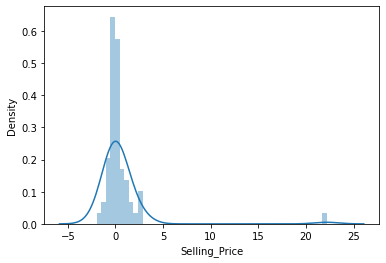

In [46]:
sn.distplot(y_test-predictions)

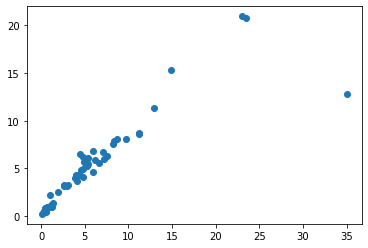

In [47]:
plt.scatter(y_test,predictions)

In [48]:
from sklearn import metrics

In [49]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9354990163934482
MSE: 8.869896412678735
RMSE: 2.9782371317070666


In [51]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [52]:
import pickle
with open('random_forest_regression_model.pkl', 'wb') as ofh:
    pickle.dump(rf_random, ofh)